### **1. 통계 기반 예측**

In [8]:
pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --------------------------------- ------ 6.8/8.1 MB 34.9 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 35.6 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 60.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 2.7/2.7 MB 25.7 MB/s eta 0:00:00
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)

   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------

In [4]:
pip install yfinance

  Using cached yfinance-0.2.58-py2.py3-none-any.whl.metadata (5.5 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
  Using cached peewee-3.18.1.tar.gz (3.0 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached curl_cffi-0.10.0-cp39-abi3-win_amd64.whl.metadata (12 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
Using cached yfinance-0.2.58-py2.py3-none-any.whl (113 kB)
Using cached curl_cffi-0.10.0-cp39-abi3-win_amd64.whl (1.4 MB)
Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
Using cached idna-3.10-py3-none-any.whl (70 kB)
  Cr

In [2]:
#코드 12-18
import pandas as pd
import yfinance as yf
tsla = yf.download('TSLA', start='2021-11-01', end='2023-03-31')
df_tsla = pd.DataFrame(tsla['Close'])
df_tsla.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Ticker,TSLA
Date,
2021-11-01,402.863342
2021-11-02,390.666656
2021-11-03,404.619995
2021-11-04,409.970001
2021-11-05,407.363342


In [2]:
df_tsla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 355 entries, 2021-11-01 to 2023-03-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TSLA    355 non-null    float64
dtypes: float64(1)
memory usage: 5.5 KB


In [3]:
#코드 12-19
df_tsla = df_tsla.reset_index()
df_tsla.columns = ['date', 'value']
df_tsla['date'] = pd.to_datetime(df_tsla['date'])

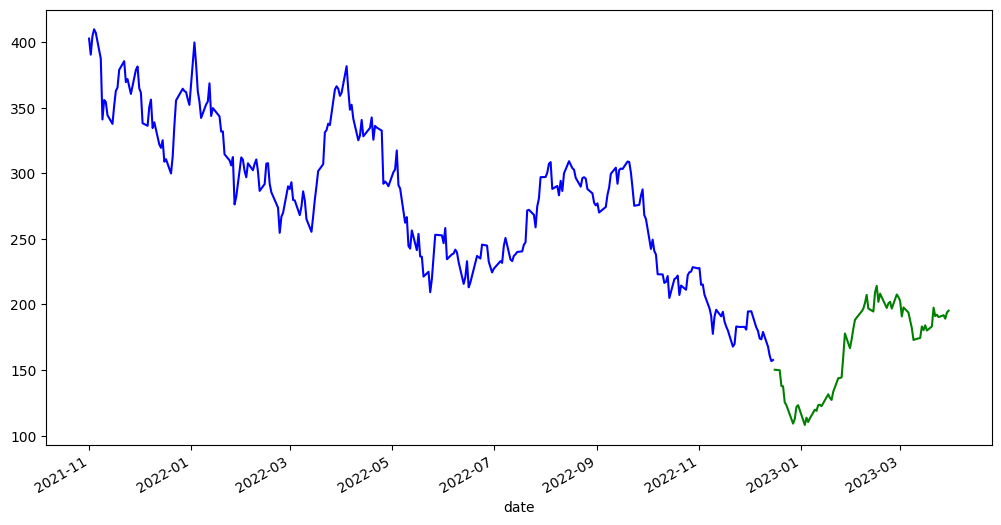

In [4]:
#코드 12-20
import matplotlib.pyplot as plt

# sklearn.model_selection.train_test_split()는 데이터를 무작위로 섞기 떄문에 시간 순서가 유지되지 않음
#데이터 분할하기
df_tsla_train = pd.DataFrame(df_tsla['value'][:int(0.8*len(df_tsla))])
df_tsla_test = pd.DataFrame(df_tsla['value'][int(0.8*len(df_tsla)):])
df_tsla_train['date'] = df_tsla['date'][:int(0.8*len(df_tsla))]
df_tsla_test['date'] = df_tsla['date'][int(0.8*len(df_tsla)):]
df_tsla_train.set_index('date', inplace=True)
df_tsla_test.set_index('date', inplace=True)

df_tsla_train['value'].plot(figsize=(12.2, 6.4), color='blue')
df_tsla_test['value'].plot(color='green')
plt.show()

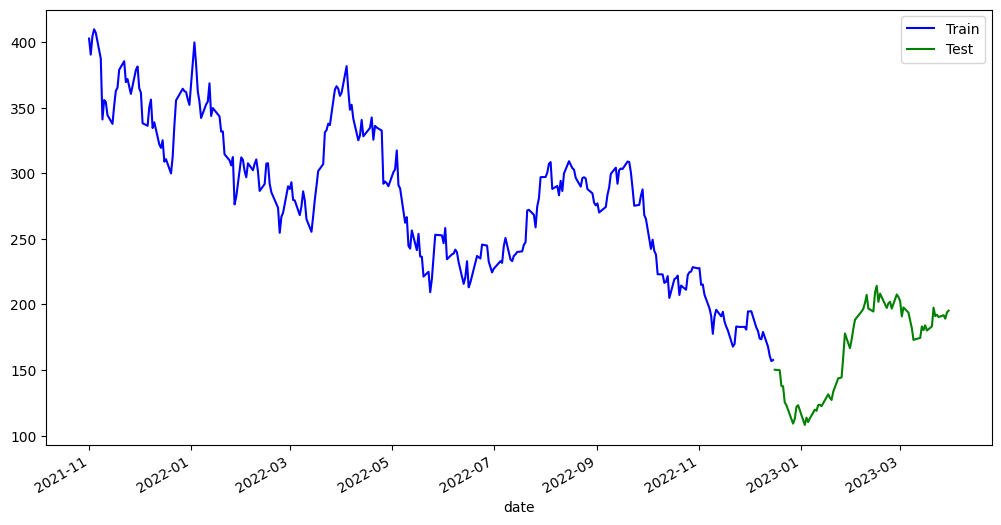

In [5]:
import matplotlib.pyplot as plt

# 날짜 인덱스를 갖는 복사본 생성
df_tsla_indexed = df_tsla.set_index('date')

# 분할 인덱스 계산
split_idx = int(len(df_tsla_indexed) * 0.8)

# train/test 분할
df_tsla_train = df_tsla_indexed.iloc[:split_idx]
df_tsla_test = df_tsla_indexed.iloc[split_idx:]

# 시각화
df_tsla_train['value'].plot(figsize=(12.2, 6.4), color='blue', label='Train')
df_tsla_test['value'].plot(color='green', label='Test')
plt.legend()
plt.show()

In [2]:
pip install pmdarima

  Using cached joblib-1.5.0-py3-none-any.whl.metadata (5.6 kB)
  Using cached urllib3-2.4.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
   ---------------------------------------- 0.0/613.3 kB ? eta -:--:--
   --------------------------------------- 613.3/613.3 kB 21.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 2.8/2.8 MB 27.1 MB/s eta 0:00:00
Using cached joblib-1.5.0-py3-none-any.whl (307 kB)
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------  12.8/12.9 MB 62.0 MB/s eta 0:00:01
   ---------------------------------------- 12.9/12.9 MB 54.2 MB/s eta 0:00:00
   -------------------------

In [7]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [8]:
#코드 12-21
from pmdarima.arima import ndiffs, nsdiffs
print(f"최적의 차분 횟수 (ADF): {ndiffs(df_tsla_train, test='adf')}")
print(f"최적의 차분 횟수 (KPSS): {ndiffs(df_tsla_train, test='kpss')}")
print(f"최적의 차분 횟수 (PP): {ndiffs(df_tsla_train, test='pp')}")

최적의 차분 횟수 (ADF): 1
최적의 차분 횟수 (KPSS): 1
최적의 차분 횟수 (PP): 1


In [9]:
#코드 12-22
print(f"최적의 차분 계수 (OSCB): {nsdiffs(df_tsla_train, m=12, test='ocsb')}")
print(f"최적의 차분 계수 (CH): {nsdiffs(df_tsla_train, m=12, test='ch')}")

최적의 차분 계수 (OSCB): 0
최적의 차분 계수 (CH): 0


In [10]:
#코드 12-23
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

n_diffs = 1
model_fit = pm.auto_arima(
    y=df_tsla_train['value'],
    d=n_diffs,
    start_p=0, max_p=2,
    start_q=0, max_q=2,
    m=1, seasonal=False, #데이터에 계절성이 없음
    stepwise=True,
    trace=True)
print(model_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2197.802, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2199.194, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2199.177, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2197.357, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2200.676, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.099 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  284
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1097.679
Date:                Tue, 06 May 2025   AIC                           2197.357
Time:                        15:10:01   BIC                           2201.003
Sample:                             0   HQIC                          2198.819
                                - 284                                       

In [11]:
#코드 12-24
tsla_pred= model_fit.predict(n_periods=len(df_tsla_test))
df_tsla_pred = pd.DataFrame(tsla_pred)

result = pd.DataFrame(df_tsla_test['value'].values,\
                      index=df_tsla_test.index, columns=['value'])
result

c:\Users\asia\.conda\envs\py310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,value
date,
2022-12-16,150.229996
2022-12-19,149.869995
2022-12-20,137.800003
2022-12-21,137.570007
2022-12-22,125.349998
...,...
2023-03-24,190.410004
2023-03-27,191.809998
2023-03-28,189.190002


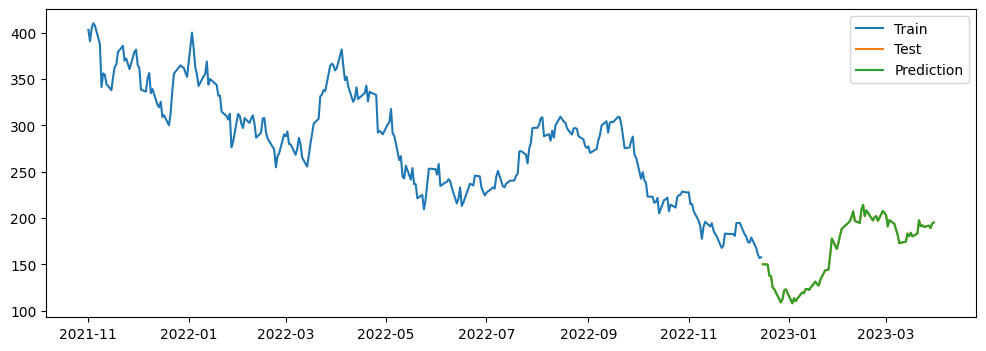

In [ ]:
#코드 12-25
fig, axes = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(df_tsla_train, label='Train') # 훈련 데이터
plt.plot(df_tsla_test, label='Test') # 테스트 데이터
plt.plot(result, label='Prediction') # 예측 데이터

plt.legend()
plt.show()

In [15]:
#코드 12-26
def each_step_prediction():
  pred_next = model_fit.predict(n_periods=1)
  return pred_next.tolist()[0] # 리스트 형태로 반환하기

pred_steps = []
for new_inst in df_tsla_test['value']:
  pred = each_step_prediction()
  pred_steps.append(pred)
  model_fit.update(new_inst)

c:\Users\asia\.conda\envs\py310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


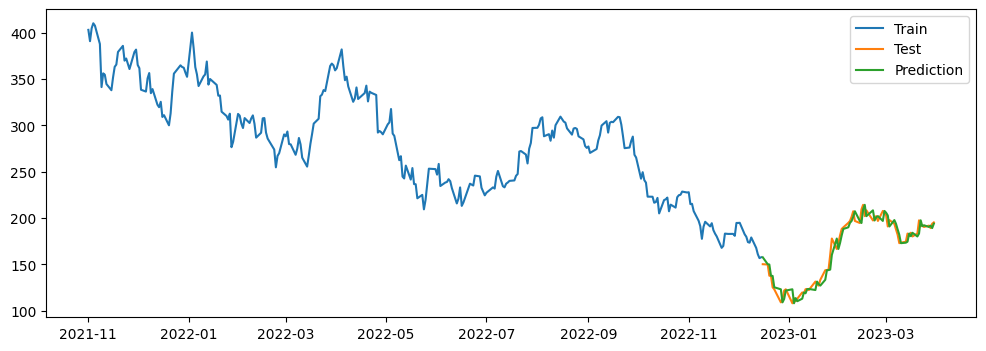

In [16]:
#코드 12-27
fig, axes = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(df_tsla_train.index, df_tsla_train['value'], label='Train')
plt.plot(df_tsla_test.index, df_tsla_test['value'], label='Test')
plt.plot(df_tsla_test.index, pred_steps, label='Prediction')

plt.legend()
plt.show()

### **2. 심화분석: 인공신경망을 활용하는 주가 예측**

In [18]:
pip install tensorflow


  Using cached absl_py-2.2.2-py3-none-any.whl.metadata (2.6 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-5.29.4-cp310-abi3-win_amd64.whl.metadata (592 bytes)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.9.2-py3-none-any.whl.metadata (6.1 kB)
  Using cached markdown-3.8-py3-none-any.whl.metadata (5.1 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached werkzeug-3.1.3-py3-none-any.whl.metadata (3.7 kB)
  Using cached rich-14.0.0-py

  You can safely remove it manually.


In [1]:
#코드 12-28
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

tsla = yf.download('TSLA', start='2021-11-01', end='2023-03-31')
df_tsla = pd.DataFrame(tsla['Close'])

df_tsla = df_tsla.reset_index()
df_tsla.columns = ['date', 'value']
df_tsla['date'] = pd.to_datetime(df_tsla['date'])
df_tsla.set_index('date', inplace=True)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [2]:
#코드 12-29
df_tsla.reset_index()
dataset_tsla = df_tsla.values

#데이터 분할하기
df_tsla_train = dataset_tsla[:int(0.8*len(dataset_tsla)), :]
df_tsla_test = dataset_tsla[int(0.8*len(dataset_tsla)):, :]

#데이터 스케일링하기
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset_tsla)

In [3]:
#코드 12-30
x_train_data,y_train_data=[],[]

#28일을 기준으로 데이터 생성하기
for i in range(28,len(df_tsla_train)):
  x_train_data.append(scaled_data[i-28:i,0])
  y_train_data.append(scaled_data[i,0])

x_train_data, y_train_data = np.array(x_train_data), np.array(y_train_data)
x_train_data = np.reshape(x_train_data, (x_train_data.shape[0],\
                                         x_train_data.shape[1],1))

In [4]:
#코드 12-31
lstm_tsla = Sequential()

lstm_tsla.add(LSTM(units=28, return_sequences=True,\
                   input_shape=(x_train_data.shape[1],1)))
lstm_tsla.add(LSTM(units=28))
lstm_tsla.add(Dense(1))

#데이터 재가공하기
inputs_data = df_tsla[len(df_tsla) - len(df_tsla_test)-28:].values
inputs_data = inputs_data.reshape(-1,1)
inputs_data = scaler.transform(inputs_data)

#모형의 학습 방법 설정하여 학습 진행하기
lstm_tsla.compile(loss='mean_squared_error', optimizer='adam')
lstm_tsla.fit(x_train_data, y_train_data, epochs=100, batch_size=1, verbose=2)

Epoch 1/100


C:\Users\asia\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


256/256 - 2s - 6ms/step - loss: 0.0171
Epoch 2/100
256/256 - 1s - 3ms/step - loss: 0.0072
Epoch 3/100
256/256 - 1s - 3ms/step - loss: 0.0054
Epoch 4/100
256/256 - 1s - 3ms/step - loss: 0.0039
Epoch 5/100
256/256 - 1s - 3ms/step - loss: 0.0039
Epoch 6/100
256/256 - 1s - 3ms/step - loss: 0.0034
Epoch 7/100
256/256 - 1s - 3ms/step - loss: 0.0031
Epoch 8/100
256/256 - 1s - 3ms/step - loss: 0.0030
Epoch 9/100
256/256 - 1s - 3ms/step - loss: 0.0028
Epoch 10/100
256/256 - 1s - 3ms/step - loss: 0.0026
Epoch 11/100
256/256 - 1s - 3ms/step - loss: 0.0023
Epoch 12/100
256/256 - 1s - 3ms/step - loss: 0.0024
Epoch 13/100
256/256 - 1s - 3ms/step - loss: 0.0022
Epoch 14/100
256/256 - 1s - 3ms/step - loss: 0.0022
Epoch 15/100
256/256 - 1s - 3ms/step - loss: 0.0020
Epoch 16/100
256/256 - 1s - 3ms/step - loss: 0.0021
Epoch 17/100
256/256 - 1s - 3ms/step - loss: 0.0021
Epoch 18/100
256/256 - 1s - 3ms/step - loss: 0.0019
Epoch 19/100
256/256 - 1s - 3ms/step - loss: 0.0019
Epoch 20/100
256/256 - 1s - 3ms/s

In [5]:
#코드 12-32
X_test = []
for i in range(28, inputs_data.shape[0]):
  X_test.append(inputs_data[i-28:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_value = lstm_tsla.predict(X_test)
predicted_value = scaler.inverse_transform(predicted_value)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


C:\Users\asia\AppData\Local\Temp\ipykernel_11680\2992675225.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tsla_test_vis['Predictions']=predicted_value


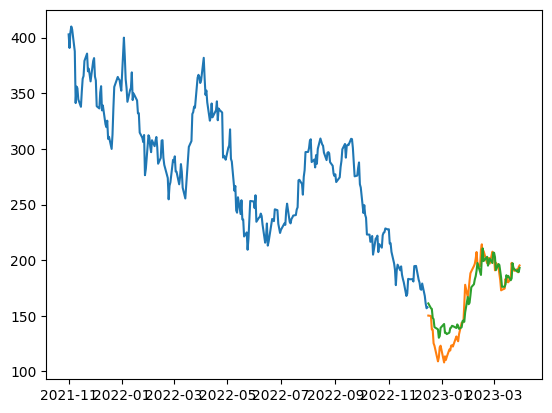

In [6]:
#코드 12-33
df_tsla_train_vis = tsla[:284]
df_tsla_test_vis = tsla[284:]

df_tsla_test_vis['Predictions']=predicted_value
plt.plot(df_tsla_train_vis["Close"])
plt.plot(df_tsla_test_vis[['Close',"Predictions"]])

# 테슬라 주가 예측 LSTM 모델 흐름 정리

## 1. 데이터 수집
- `yfinance` 라이브러리를 활용하여 테슬라(TSLA)의 일정 기간 동안의 주가 데이터를 가져온다.
- 그중에서 **종가(Close)** 만을 선택하여 예측 대상이 되는 시계열 데이터를 구성한다.

## 2. 데이터 전처리
- 날짜 컬럼을 시계열 인덱스로 설정하고, 컬럼명을 정돈한다.
- 이 과정을 통해 시계열 분석에 적합한 형태로 데이터를 정리한다.

## 3. 학습/테스트 데이터 분할
- 전체 데이터 중 80%를 학습용, 나머지 20%를 테스트용으로 나눈다.
- 시계열 특성상 무작위 분할이 아닌 **시간 순서 기준 분할**을 사용한다.

## 4. 데이터 정규화
- LSTM과 같은 신경망 모델은 입력값의 크기에 민감하므로, 0과 1 사이로 정규화한다.
- 이를 위해 `MinMaxScaler`를 사용하여 모든 데이터가 동일한 스케일을 갖도록 만든다.

## 5. 시계열 시퀀스 생성
- LSTM의 입력 형태를 만들기 위해 **고정된 시간 간격(여기선 28일)** 의 데이터를 하나의 시퀀스로 묶는다.
- 각 시퀀스는 28일간의 데이터를 입력으로, 다음날의 주가를 타겟으로 설정한다.

## 6. LSTM 모델 구성
- 시계열 데이터를 처리할 수 있는 **순환 신경망(LSTM)** 구조를 설계한다.
- 두 층의 LSTM과 하나의 Dense(출력) 층으로 구성된 간단한 시계열 예측 모델이다.

## 7. 모델 학습
- 손실 함수로는 평균제곱오차(MSE)를 사용하고, 옵티마이저는 Adam을 사용한다.
- 100번의 에폭 동안 모델을 학습시켜 과거 데이터를 기반으로 미래의 주가를 예측할 수 있도록 만든다.

## 8. 예측 수행
- 테스트셋 이전 시점부터 입력 시퀀스를 구성하여 예측에 사용할 데이터를 준비한다.
- 모델을 통해 미래 주가를 예측한 후, 정규화 이전의 값으로 복원하여 실제 주가와 비교할 수 있게 한다.

## 9. 결과 시각화
- 학습 구간과 테스트 구간을 나누어 **실제 주가와 예측 주가를 함께 시각화**한다.
- 이를 통해 모델의 예측력이 시각적으로 어느 정도인지 확인할 수 있다.

## 요약
이 모델은 과거 28일 간의 주가 정보를 바탕으로 다음날의 주가를 예측하는 구조이다.  
LSTM을 활용해 시계열 데이터를 학습하고, 실제와 예측값을 비교함으로써 모델의 유효성을 검토한다.
